In [20]:
# Ford-Fulkerson Algorithm for Maximum Flow Problem
# This code is contributed by Neelam Yadav
"""
Description:
    (1) Start with initial flow as 0;
    (2) Choose augmenting path from source to sink and add path to flow;
"""


# Funcion BFS
"""
Retorna true si hay una ruta desde la fuente 's' hasta el sumidero 't'. 
También llena parent[] para almacenar la ruta
"""
def BFS(graph, s, t, parent):
    # Return True if there is node that has not iterated.
    visited = [False] * len(graph)  # Marca todos los vertices como no visitados.
    queue = []  # Cola para el recorrido BFS
    # Marca el nodo como visitado y lo agrega a la cola
    queue.append(s)
    visited[s] = True
 
    while queue:
        u = queue.pop(0) #Saca un vertice de la Cola y lo muestra

        # Obtiene todos los vértices adyacentes del vértice desencolado "u"
        # Si no se ha visitado un adyacente, se marca como visitado y se pone en cola
        for ind in range(len(graph[u])):
            if visited[ind] is False and graph[u][ind] > 0:
                # Si encontramos una conexión con el nodo sumidero (destino),
                # entonces ya no tiene sentido recorrer en BFS
                # Solo tenemos que establecer su padre y devolver verdadero
                queue.append(ind) #Se agrega a la cola
                visited[ind] = True #Se marca como visitado
                parent[ind] = u #Establecer su padre
 
    return True if visited[t] else False
    # Si No alcanzamos el sumidero(destino) en el inicio de BFS del origen, se devuelve falso
 
#Retorna el MAximo flujo de "s"(source) a "t"(sink)
def FordFulkerson(graph, source, sink):
    # This array is filled by BFS and to store path
    parent = [-1] * (len(graph))
    max_flow = 0  # No hay maximo flujo inicial. Entonces Flujo Inicial = 0
    
    # Se aumenta el flujo mientras haya un camino desde la fuente(source) hasta el sumidero(sink)
    while BFS(graph, source, sink, parent):
        # Se halla la capacidad residual mínima de las aristas a lo largo de la
        # ruta llenada por BFS: El flujo máximo a través de la ruta encontrada.
        path_flow = float("Inf")
        s = sink
 
        while s != source:
            # Find the minimum value in select path
            path_flow = min(path_flow, graph[parent[s]][s])
            s = parent[s]
        # Agregar "path_flow" al flujo general
        max_flow += path_flow
        # Actualizar las capacidades residuales de las aristas y aristas inversas a lo largo del camino
        v = sink
        while v != source:
            u = parent[v]
            graph[u][v] -= path_flow
            graph[v][u] += path_flow
            v = parent[v]
    return max_flow
 

# Usamos una Matriz de Adyacencia para la representación del DiGrafo
# Los indices 
graph = [
    [0, 16, 13, 0, 0, 0],
    [0, 0, 10, 12, 0, 0],
    [0, 4, 0, 0, 14, 0],
    [0, 0, 9, 0, 0, 20],
    [0, 0, 0, 7, 0, 4],
    [0, 0, 0, 0, 0, 0],
]
 
source, sink = 0, 5 # Origen=0, Destino=5
print("El Maximo Flujo Posible es: ", FordFulkerson(graph, source, sink))

El Maximo Flujo Posible es:  23


### Caminos de Aumento

#####Los Caminos de Aumento son:
#####{0,1,3,5} Flujo=12
#####{0,2,4,3,5} Flujo=7
#####{0,2,4,5} Flujo=4


### Graficamos el Máximo Flujo de Redes

graph max flow:  [[0, 4, 2, 0, 0, 0], [12, 0, 10, 0, 0, 0], [11, 4, 0, 0, 3, 0], [0, 12, 9, 0, 7, 1], [0, 0, 11, 0, 0, 0], [0, 0, 0, 19, 4, 0]]



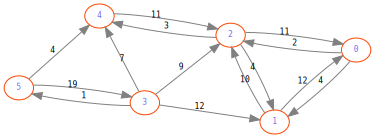

In [22]:
import graphviz as gv

graph_maxflow = gv.Digraph()

#Atributos del Grafo
graph_maxflow.graph_attr["layout"] = "sfdp"
graph_maxflow.edge_attr["color"] = "gray"
graph_maxflow.node_attr["color"] = "orangered"
graph_maxflow.node_attr["width"] = "0.1"
graph_maxflow.node_attr["height"] = "0.1"
graph_maxflow.node_attr["fontsize"] = "8"
graph_maxflow.node_attr["fontcolor"] = "mediumslateblue"
graph_maxflow.node_attr["fontname"] = "monospace"
graph_maxflow.edge_attr["fontsize"] = "8"
graph_maxflow.edge_attr["fontname"] = "monospace"

print("graph max flow: ", graph)
print()

for u in range(len(graph)):
  for v in range(len(graph)):
    if (graph[u][v] != 0):
      graph_maxflow.edge(str(u), str(v), color = "gray", label = str(graph[u][v]))

graph_maxflow